# Install Dependencies/Setup GPU Acceleration

In [1]:
import tensorflow as tf
import os

In [2]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

# 1.1 Declare file path

In [3]:
path = "car_images"

In [4]:
os.listdir(path)

['Kia',
 'Maserati',
 'Dodge',
 'Chevrolet',
 'Cadillac',
 'MG',
 'Genesis',
 'Bugatti',
 'GMC',
 'Bentley',
 'Renault',
 'Lincoln',
 'Jeep',
 'Audi',
 'Hyundai',
 'Tesla',
 'Jaguar',
 'image_cars',
 'Volvo',
 'Volkswagen',
 'Pontiac',
 'BMW',
 'Toyota',
 'Ferrari',
 'Subaru',
 'Aston Martin',
 '.ipynb_checkpoints',
 'Porsche',
 'Lamborghini',
 'Honda',
 'Nissan',
 'Ford',
 'Ram Trucks',
 'Acura',
 'Infiniti',
 'Land Rover',
 'Mazda',
 'Buick',
 'Alfa Romeo',
 'Mitsubishi',
 'Chrysler',
 'Mercedes-Benz',
 'Lexus']

# 1.2 Load Data

In [5]:

data = tf.keras.utils.image_dataset_from_directory(path,image_size = (28,28),batch_size = 128)

Found 68395 files belonging to 43 classes.


In [6]:
data = data.take(40000 // 128)

In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

In [10]:
labels_list = sorted(os.listdir(path))
label_dictionary = {labels_list[i]:i for i in range(len(labels_list))}
print(label_dictionary)

{'.ipynb_checkpoints': 0, 'Acura': 1, 'Alfa Romeo': 2, 'Aston Martin': 3, 'Audi': 4, 'BMW': 5, 'Bentley': 6, 'Bugatti': 7, 'Buick': 8, 'Cadillac': 9, 'Chevrolet': 10, 'Chrysler': 11, 'Dodge': 12, 'Ferrari': 13, 'Ford': 14, 'GMC': 15, 'Genesis': 16, 'Honda': 17, 'Hyundai': 18, 'Infiniti': 19, 'Jaguar': 20, 'Jeep': 21, 'Kia': 22, 'Lamborghini': 23, 'Land Rover': 24, 'Lexus': 25, 'Lincoln': 26, 'MG': 27, 'Maserati': 28, 'Mazda': 29, 'Mercedes-Benz': 30, 'Mitsubishi': 31, 'Nissan': 32, 'Pontiac': 33, 'Porsche': 34, 'Ram Trucks': 35, 'Renault': 36, 'Subaru': 37, 'Tesla': 38, 'Toyota': 39, 'Volkswagen': 40, 'Volvo': 41, 'image_cars': 42}


# 1.3 Visualization

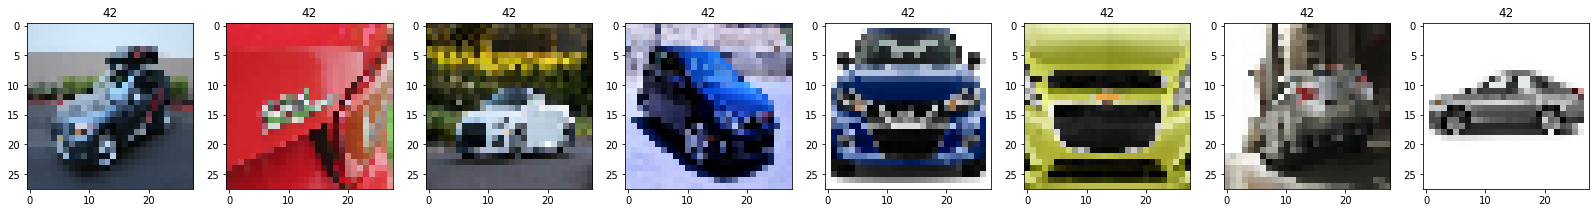

In [11]:
fig, ax = plt.subplots(ncols = 8, figsize = (28,28))
rows = 0
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Data Preparation

# 2.1 Normalization

In [12]:
# data = data.map(lambda x,y: (x/255,y))
# data_iterator = data.as_numpy_iterator()

data = data.map(lambda x,y: ((x-127.5)/127.5,y))
data_iterator = data.as_numpy_iterator()

In [13]:
batch = data_iterator.next()

In [14]:
batch[0].shape

(128, 28, 28, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


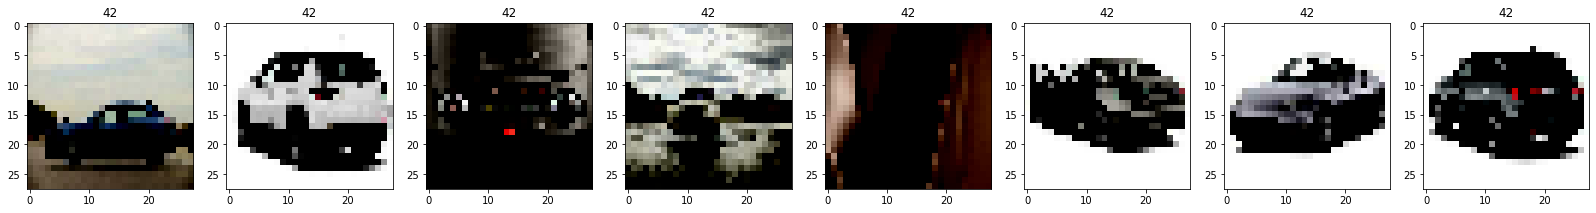

In [15]:
fig, ax = plt.subplots(ncols = 8, figsize = (28,28))
rows = 0
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 2.2 check normalization

In [16]:
batch[0][0]

array([[[ 0.7015406 ,  0.6780112 ,  0.6387955 ],
        [ 0.8141457 ,  0.80630255,  0.76708686],
        [ 0.8980392 ,  0.8901961 ,  0.8509804 ],
        ...,
        [ 0.8413164 ,  0.87268895,  0.8648458 ],
        [ 0.72268903,  0.7540616 ,  0.74621844],
        [ 0.5513099 ,  0.5983687 ,  0.5983687 ]],

       [[ 0.76806724,  0.74453783,  0.70532215],
        [ 0.8581233 ,  0.85028017,  0.8110645 ],
        [ 0.90588236,  0.8980392 ,  0.85882354],
        ...,
        [ 0.80518186,  0.8365544 ,  0.8287113 ],
        [ 0.7291316 ,  0.7605041 ,  0.752661  ],
        [ 0.59466755,  0.6417264 ,  0.6417264 ]],

       [[ 0.7947878 ,  0.7869447 ,  0.747729  ],
        [ 0.88235295,  0.8745098 ,  0.8352941 ],
        [ 0.8980392 ,  0.8901961 ,  0.8509804 ],
        ...,
        [ 0.8390757 ,  0.8469188 ,  0.80770314],
        [ 0.8061624 ,  0.8168067 ,  0.7804922 ],
        [ 0.65361124,  0.70067006,  0.6849838 ]],

       ...,

       [[ 0.32296908,  0.26806712,  0.18963575],
        [ 0

In [17]:
batch[0].shape

(128, 28, 28, 3)

# 3. Build Generator

# 3.1 Import libraries

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, LeakyReLU,UpSampling2D,Dropout, MaxPooling2D,BatchNormalization, ReLU

# 3.2 Contruct Generator

In [19]:
def build_generator():
    model = Sequential()
    model.add(Dense(128 * 7 * 7, input_dim=100))  # Input dimension is the latent vector size
    model.add(LeakyReLU())
    model.add(Reshape((7, 7, 128)))
    model.add(BatchNormalization())
    model.add(Conv2DTranspose(128, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU())
    model.add(BatchNormalization())
    model.add(Conv2DTranspose(256, kernel_size=4, strides=2, padding='same'))  # 28x28x3 output
    model.add(Conv2D(3, kernel_size=4, padding='same', activation='tanh'))  # 28x28x3 output
    return model

In [20]:
generator = build_generator()

In [21]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6272)              633472    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 6272)              0         
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 128)       262272    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 128)       5

In [22]:
img = generator.predict(np.random.randn(4,100))

In [23]:
img.shape

(4, 28, 28, 3)

# 3.3 Pre-trained generations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


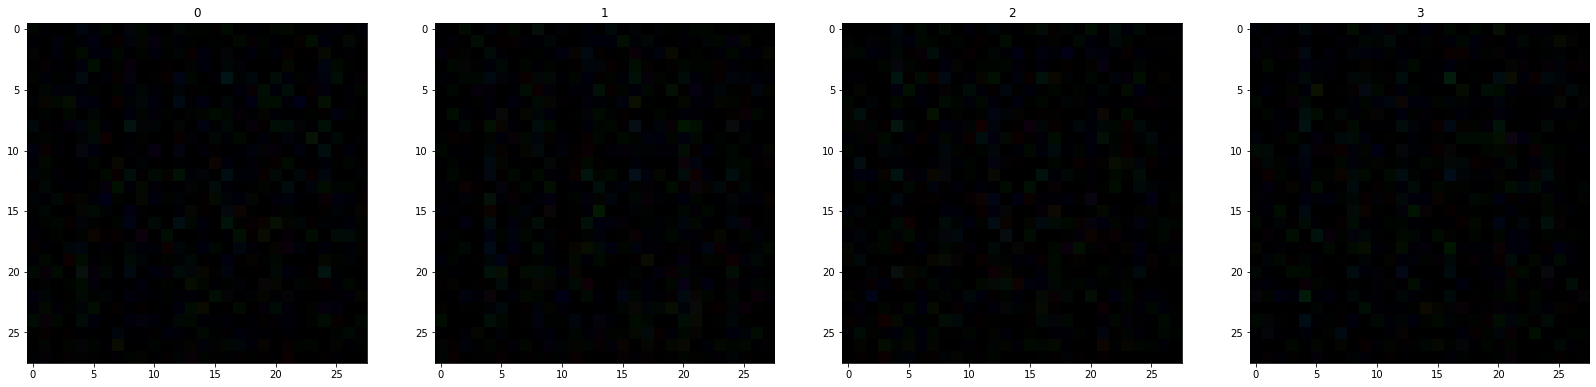

In [24]:
fig, ax = plt.subplots(ncols = 4, figsize = (28,28))
for idx, img in enumerate(img):
    ax[idx].imshow(img)
    ax[idx].title.set_text(idx)

# 4. Build Discriminator

# 4.1 Discriminator function

In [25]:
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=4, strides=2, padding='same', input_shape=(28, 28, 3)))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    model.add(Conv2D(128, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    model.add(Conv2D(256, kernel_size=4, strides=2, padding='same'))
    model.add(LeakyReLU())
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

In [26]:
discriminator = build_discriminator()

In [27]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 64)        3136      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         131200    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 256)        

# 4.2 Evaluate initial prediction

In [28]:
test = generator.predict(np.random.randn(4,100))

In [29]:
test.shape

(4, 28, 28, 3)

In [30]:
discriminator.predict(test)

array([[0.50023466],
       [0.49971905],
       [0.5003378 ],
       [0.4995617 ]], dtype=float32)

# 5. Training loop

# 5.1 Install requirements

In [31]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [32]:
g_opt = Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.999)
d_opt = Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.999)

In [33]:
#g_opt = Adam(learning_rate = 0.01)
g_loss = BinaryCrossentropy()

#d_opt = Adam(learning_rate = 0.001)
d_loss = BinaryCrossentropy()

# 5.2 Build Model class

In [34]:
from tensorflow.keras.models import Model

In [35]:
# class HypercarGAN(Model):

#     def __init__(self,generator,discriminator,*args,**kwargs):
#         super().__init__(*args,**kwargs)

#         self.generator = generator
#         self.discriminator = discriminator

#     def compile(self,g_opt,g_loss,d_opt,d_loss,*args,**kwargs):
#         super().compile(*args,**kwargs)

#         self.g_opt = g_opt
#         self.g_loss = g_loss

#         self.d_opt = d_opt
#         self.d_loss = d_loss

#     def train_step(self,batch):

#         real_images = batch[0]
#         fake_images = self.generator(tf.random.normal((128,100)), training = False)

#         # discriminator training
#         with tf.GradientTape() as d_tape:

#             yhat_real = self.discriminator(real_images, training = True)
#             yhat_fake = self.discriminator(fake_images, training = True)
#             yhat_realfake = tf.concat([yhat_real,yhat_fake], axis = 0)

#             # specify real/fake images

#             #y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis = 0)
#             y_realfake = tf.concat([tf.ones_like(yhat_real),tf.zeros_like(yhat_fake)],axis = 0)

#             # add noise
#             # noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
#             # noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
#             noise_real = -0.15*tf.random.uniform(tf.shape(yhat_real))
#             noise_fake = 0.15*tf.random.uniform(tf.shape(yhat_fake))
#             y_realfake += tf.concat([noise_real,noise_fake],axis = 0)

#             # loss

#             total_d_loss = self.d_loss(y_realfake, yhat_realfake)

#         # back propogation

#         dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
#         self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))

#     # generator training

#         with tf.GradientTape() as g_tape:

#             gen_images = self.generator(tf.random.normal((128,100)),training = True)

#             predicted_labels = self.discriminator(gen_images, training = False)
#             # was initially zeros_like
#             total_g_loss = self.g_loss(tf.ones_like(predicted_labels), predicted_labels)

#         # back propogation

#         ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
#         self.g_opt.apply_gradients(zip(ggrad,self.generator.trainable_variables))

#         return {"d_loss":total_d_loss, "g_loss": total_g_loss}

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Model

class HypercarGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, g_loss, d_opt, d_loss, *args, **kwargs):
        super().compile(*args, **kwargs)
        self.g_opt = g_opt
        self.g_loss = g_loss
        self.d_opt = d_opt
        self.d_loss = d_loss

    def train_step(self, batch):
        real_images = batch[0]
        batch_size = tf.shape(real_images)[0]

        # Train discriminator with real and fake images
        with tf.GradientTape() as d_tape:
            # Generate fake images
            random_latent_vectors = tf.random.normal(shape=(batch_size, 100))
            fake_images = self.generator(random_latent_vectors, training=False)

            # Discriminator predictions
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Labels for real and fake images
            y_realfake = tf.concat([tf.ones_like(yhat_real), tf.zeros_like(yhat_fake)], axis=0)

            # Add noise to the labels
            noise_real = -0.15 * tf.random.uniform(tf.shape(yhat_real))
            noise_fake = 0.15 * tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Compute discriminator loss
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation to the discriminator
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train generator
        with tf.GradientTape() as g_tape:
            random_latent_vectors = tf.random.normal(shape=(batch_size, 100))
            gen_images = self.generator(random_latent_vectors, training=True)

            # Discriminator's predictions on generated images
            predicted_labels = self.discriminator(gen_images, training=False)

            # Compute generator loss
            total_g_loss = self.g_loss(tf.ones_like(predicted_labels), predicted_labels)

        # Apply backpropagation to the generator
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss": total_d_loss, "g_loss": total_g_loss}

# Usage example:
# Assuming you have already created `generator` and `discriminator` models and defined `g_opt`, `d_opt`, `g_loss`, and `d_loss`.

# hypercar_gan = HypercarGAN(generator, discriminator)
# hypercar_gan.compile(g_opt=g_opt, g_loss=g_loss, d_opt=d_opt, d_loss=d_loss)

# # To train the model
# hypercar_gan.fit(dataset, epochs=num_epochs)


# 5.3 Instantiate Class

In [37]:
CarGAN = HypercarGAN(generator,discriminator)

In [38]:
CarGAN.compile(g_opt,g_loss,d_opt,d_loss)

In [39]:
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [40]:
class Monitor(Callback):
    def __init__(self,num_img=1,latent_dim = 100):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self,epoch,logs = None):
        random_latent_vectors = tf.random.uniform((self.num_img,self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        # mult by 255 is not usint tanh else use *127.5 + 127.5
        generated_images *= 127.5
        generated_images += 127.5
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            # if using colab use /content/car_generated_images instead of /car_generated_images
            img.save(os.path.join('car_generated_images',f'generated_img{epoch}_{i}.png'))

In [43]:
hist = CarGAN.fit(data,epochs = 1,callbacks = [Monitor()])

312/312 [==============================] - 15s 48ms/step - d_loss: 0.4936 - g_loss: 2.2278


In [48]:
#generator.save("generator_model.keras")

In [50]:
#discriminator.save("discriminator_model.keras")

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


CarGAN = load_model("generator_model.keras")



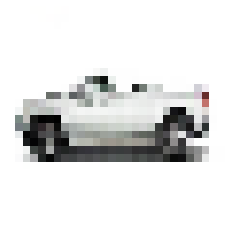

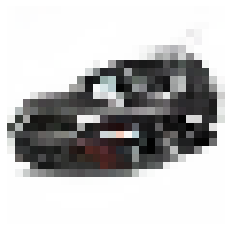

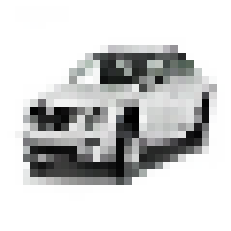

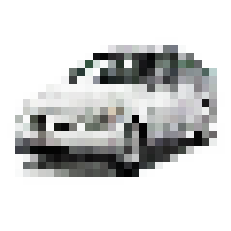

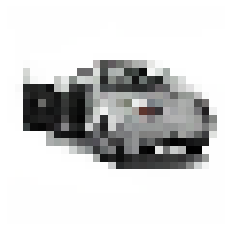

In [55]:
latent_dim = 100

# Generate random latent vectors (input noise for the generator)
num_samples = 5  # Number of images to generate
random_latent_vectors = np.random.normal(size=(num_samples, latent_dim))

# Generate images
generated_images = CarGAN.predict(random_latent_vectors)

# Plot the generated images
for i in range(num_samples):
    plt.imshow((generated_images[i] * 127.5 + 127.5).astype(np.uint8))  # Convert from [-1, 1] to [0, 255]
    plt.axis('off')
    plt.show()